In [96]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy.stats as stats
import os

In [97]:
# Carregando dados
file_path = os.path.join(os.getcwd(), 'datasets', 'SUV_Network_Ads.csv')
df = pd.read_csv(file_path, delimiter=',')

# Análise Exploratória

In [98]:
df['Gender'] = df['Gender'].replace({'Male':1, 'Female':0})
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [99]:
df.shape

(400, 5)

In [100]:
df.dtypes

User ID            int64
Gender             int64
Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object

In [101]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

<Axes: xlabel='EstimatedSalary', ylabel='Age'>

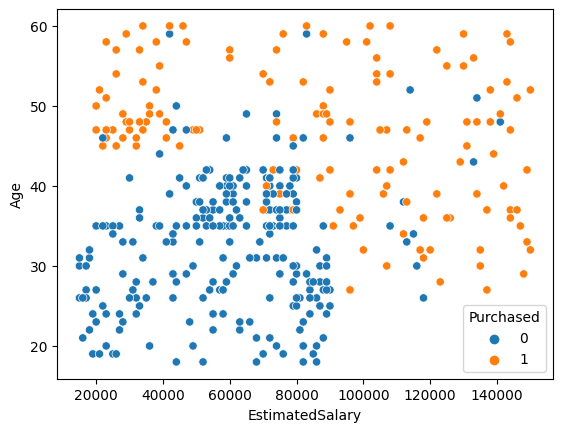

In [102]:
sns.scatterplot(data= df, x=df['EstimatedSalary'], y=df['Age'], hue=df['Purchased'])

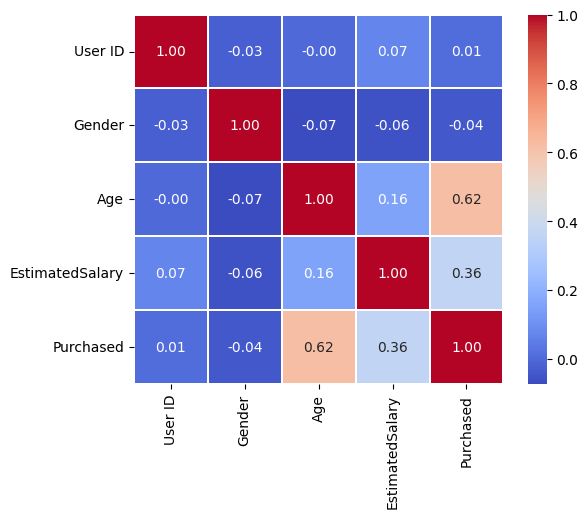

In [103]:
sns.heatmap(df.corr(), cmap='coolwarm', fmt='.2f', linewidths=0.1,
            vmax=1.0, square=True, linecolor='white', annot=True);

In [104]:
modelo1 = smf.glm(formula='Purchased ~ Gender + Age + EstimatedSalary',
                  data=df, family = sm.families.Binomial()).fit()
print(modelo1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Purchased   No. Observations:                  400
Model:                            GLM   Df Residuals:                      396
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -137.92
Date:                Tue, 19 Sep 2023   Deviance:                       275.84
Time:                        17:12:17   Pearson chi2:                     459.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4590
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -12.7836      1.359     

In [105]:
modelo2 = smf.glm(formula='Purchased ~ Age + EstimatedSalary',
                  data=df, family = sm.families.Binomial()).fit()
print(modelo2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Purchased   No. Observations:                  400
Model:                            GLM   Df Residuals:                      397
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -138.53
Date:                Tue, 19 Sep 2023   Deviance:                       277.05
Time:                        17:12:17   Pearson chi2:                     467.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4574
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -12.4340      1.300     

In [106]:
AIC_1 = modelo1.aic
AIC_1

283.84322537592294

In [107]:
AIC_2 = modelo2.aic
AIC_2

283.05138239148346

In [108]:
df['Probabilidade'] = modelo2.predict(df[['Age', 'EstimatedSalary']])

In [109]:
df.sort_values('Probabilidade', ascending=False)

,User ID,Gender,Age,EstimatedSalary,Purchased,Probabilidade
219,15732987,1,59,143000,1,0.998462
336,15664907,1,58,144000,1,0.998127
373,15708791,1,59,130000,1,0.997550
215,15779529,0,60,108000,1,0.995733
227,15685346,1,56,133000,1,0.995576
...,...,...,...,...,...,...
32,15573452,0,21,16000,0,0.000952
191,15662067,0,19,26000,0,0.000854
139,15741094,1,19,25000,0,0.000824
104,15672091,0,19,21000,0,0.000714


<Axes: xlabel='Probabilidade', ylabel='Age'>

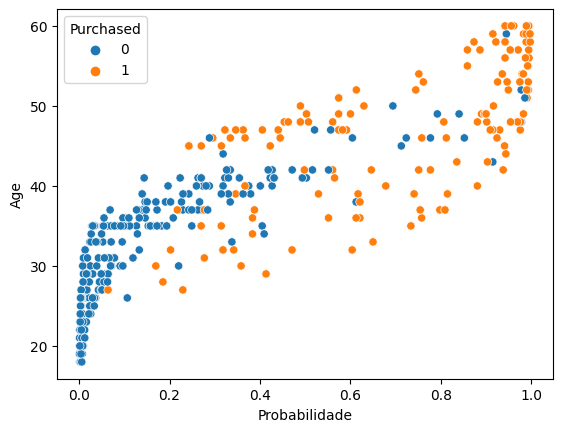

In [111]:
sns.scatterplot(data= df, x=df['Probabilidade'], y=df['Age'], hue=df['Purchased'])